<a href="https://colab.research.google.com/github/deep0505sharma/GAN-Data-Modellinng/blob/main/QCG_Project_Deepak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit


In [ ]:
!pip install pylatexenc

In [ ]:
!pip install qiskit-aqua[cplex]

In [ ]:
!pip3 install -e

In [5]:
from qiskit import *
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
import time
import matplotlib.pyplot as plt
from IPython import display
def hold(circuit, state, counts, fig1, fig2, fig3):
    circuit.draw(output='mpl', fold=100, ax=fig1.gca())
    plot_state_qsphere(state, ax=fig2.gca())
    plot_histogram(counts, ax=fig3.gca())
    display.display(fig1)
    display.display(fig2)
    display.display(fig3)
    display.clear_output(wait=True)
    time.sleep(2)

In [12]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit

# Problem size: width and number of iterations
n = 5
steps = int(np.sqrt(2**n))
oracle=QuantumCircuit(5,name='oracle')
# Diagonal operators for mark and diffuse
mark_state = Statevector.from_label('11010')
mark_state2 = Statevector.from_label('11011')
mark_state3 = Statevector.from_label('11001')
mark_state4 = Statevector.from_label('11110')
mark_state5 = Statevector.from_label('11000')

mark_circuit1 = Diagonal((-1)**mark_state.data)  # circuit that induces a -1 phase on the mark_state
mark_circuit2 = Diagonal((-1)**mark_state2.data)  # circuit that induces a -1 phase on the mark_state21
mark_circuit3 = Diagonal((-1)**mark_state3.data)
mark_circuit4 = Diagonal((-1)**mark_state4.data)
mark_circuit5 = Diagonal((-1)**mark_state5.data)


In [13]:


oracle.append(mark_circuit1, [0,1,2,3,4])
oracle.append(mark_circuit2, [0,1,2,3,4] )
oracle.append(mark_circuit3, [0,1,2,3,4])
oracle.append(mark_circuit4, [0,1,2,3,4])
oracle.append(mark_circuit5, [0,1,2,3,4])
oracle.draw()

┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐
q_0: ┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├
     │           ││           ││           ││           ││           │
q_1: ┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├
     │           ││           ││           ││           ││           │
q_2: ┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├
     │           ││           ││           ││           ││           │
q_3: ┤3          ├┤3          ├┤3          ├┤3          ├┤3          ├
     │           ││           ││           ││           ││           │
q_4: ┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├
     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘

In [15]:
amp = QuantumCircuit(5,name='amp');
amp.h([0,1,2,3,4])
amp.x([0,1,2,3,4])
invert_state = Statevector.from_label('11111')
invert_state = Diagonal((-1)**invert_state.data)
amp.append(invert_state,[0,1,2,3,4])
amp.x([0,1,2,3,4])
amp.h([0,1,2,3,4])
amp.draw()

┌───┐┌───┐┌───────────┐┌───┐┌───┐
q_0: ┤ H ├┤ X ├┤0          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_1: ┤ H ├┤ X ├┤1          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_2: ┤ H ├┤ X ├┤2 Diagonal ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_3: ┤ H ├┤ X ├┤3          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_4: ┤ H ├┤ X ├┤4          ├┤ X ├┤ H ├
     └───┘└───┘└───────────┘└───┘└───┘

In [25]:
grover_circuit = QuantumCircuit(5,5)
grover_circuit.h([0,1,2,3,4])
grover_circuit.append(oracle,[0,1,2,3,4])
grover_circuit.append(amp,[0,1,2,3,4])
grover_circuit.append(oracle,[0,1,2,3,4])
grover_circuit.append(amp,[0,1,2,3,4])
# Import Aer
from qiskit import Aer,execute

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution
job = execute(grover_circuit,backend)
result = job.result()
outputstate = result.get_statevector()
print(outputstate)
grover_circuit.measure([0,1,2,3,4],[0,1,2,3,4])
grover_circuit.draw()



Statevector([-0.08562621-2.65281156e-16j, -0.08562621-3.39482356e-16j,
             -0.08562621-4.78922457e-16j, -0.08562621-6.35661240e-16j,
             -0.08562621-3.11113110e-16j, -0.08562621-4.58105775e-16j,
             -0.08562621-4.51227679e-16j, -0.08562621-6.54187264e-16j,
             -0.08562621-4.15865307e-16j, -0.08562621-5.48038464e-16j,
             -0.08562621-4.97333451e-16j, -0.08562621-7.82271624e-16j,
             -0.08562621-2.91687794e-16j, -0.08562621-5.14570893e-16j,
             -0.08562621-3.62371439e-16j, -0.08562621-5.32088275e-16j,
             -0.08562621-3.91874509e-16j, -0.08562621-2.47500552e-16j,
             -0.08562621-4.59799039e-16j, -0.08562621-4.43065475e-16j,
             -0.08562621-2.74642457e-16j, -0.08562621-5.08371296e-16j,
             -0.08562621-3.97409791e-16j, -0.08562621-2.91588598e-16j,
              0.4005097 +2.52698886e-15j,  0.4005097 +2.57869639e-15j,
              0.4005097 +2.36919288e-15j,  0.4005097 +2.59079396e-15j,
      

┌───┐┌─────────┐┌──────┐┌─────────┐┌──────┐┌─┐            
q_0: ┤ H ├┤0        ├┤0     ├┤0        ├┤0     ├┤M├────────────
     ├───┤│         ││      ││         ││      │└╥┘┌─┐         
q_1: ┤ H ├┤1        ├┤1     ├┤1        ├┤1     ├─╫─┤M├─────────
     ├───┤│         ││      ││         ││      │ ║ └╥┘┌─┐      
q_2: ┤ H ├┤2 oracle ├┤2 amp ├┤2 oracle ├┤2 amp ├─╫──╫─┤M├──────
     ├───┤│         ││      ││         ││      │ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├┤3        ├┤3     ├┤3        ├┤3     ├─╫──╫──╫─┤M├───
     ├───┤│         ││      ││         ││      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├┤4        ├┤4     ├┤4        ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└─────────┘└──────┘└─────────┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                 0  1  2  3  4

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-686 contains invalid instructions {"gates": {oracle, amp}} for "statevector" method.


QiskitError: ignored

{'00001': 6, '01101': 6, '01100': 11, '01000': 9, '10001': 6, '01010': 9, '00101': 8, '01001': 7, '10101': 6, '10000': 7, '00010': 6, '00110': 8, '10011': 6, '11001': 161, '11010': 175, '11100': 15, '11110': 164, '10111': 8, '11000': 152, '11011': 163, '10110': 12, '11111': 9, '10010': 5, '01110': 6, '00111': 9, '00100': 5, '00011': 6, '00000': 5, '01011': 10, '10100': 10, '11101': 9, '01111': 5}


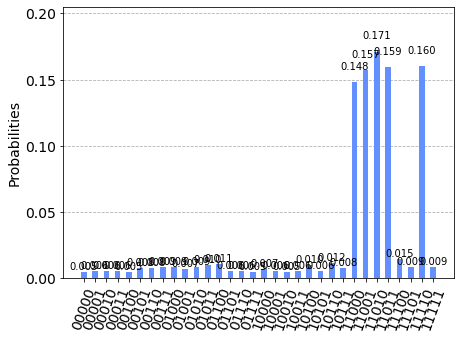

In [20]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(grover_circuit, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(grover_circuit)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)